In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('housing data.csv')

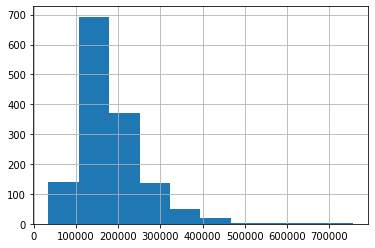

In [3]:
# Histogram 

housing['SalePrice'].hist()

## sns.distplot(housing['SalePrice'], kde=False)

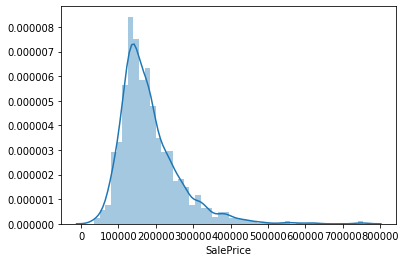

In [4]:
# Probability distribution

sns.distplot(housing['SalePrice'])

In [5]:
# Skewness and Kurtosis

print("Skewness:", housing['SalePrice'].skew())
print("Kurtosis:", housing['SalePrice'].kurt())

Skewness: 1.8646120239750106
Kurtosis: 6.432852054835754


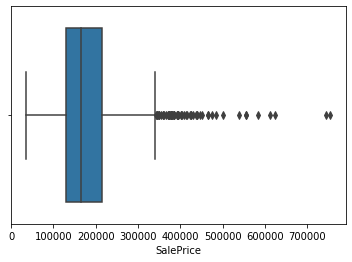

In [6]:
# BoXplot

sns.boxplot(housing['SalePrice'])

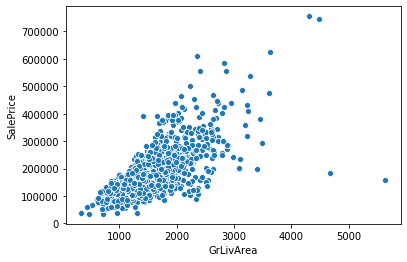

In [7]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing)

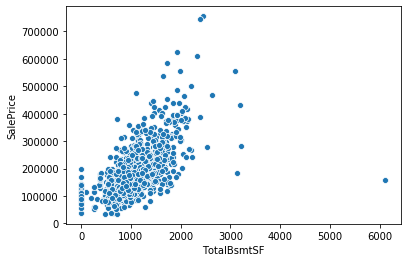

In [8]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=housing)

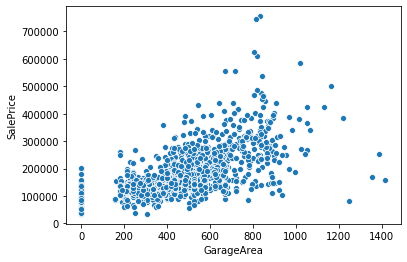

In [9]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=housing)

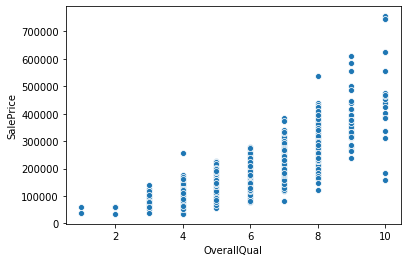

In [10]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=housing)

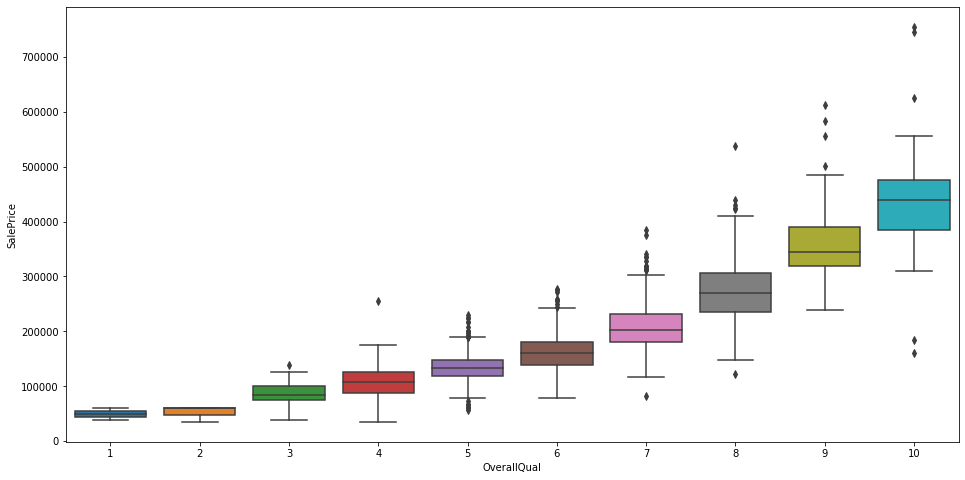

In [11]:
# Box plot between 'OverallQual' and 'SalePrice'

plt.subplots(figsize=(16, 8))
sns.boxplot('OverallQual', 'SalePrice', data = housing)

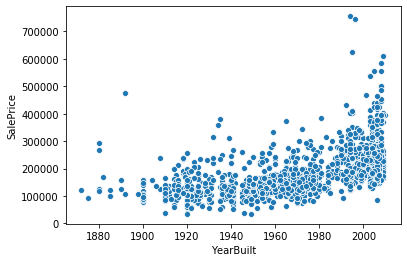

In [12]:
# Scatter plot between 'YearBuilt' and 'SalePrice'

sns.scatterplot(x='YearBuilt', y='SalePrice', data=housing)

#### Correlation matrix (heatmap style)

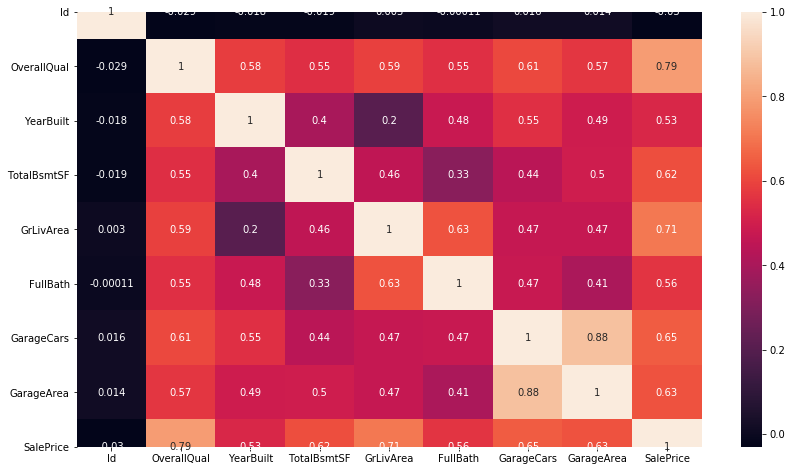

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(housing.corr(),annot=True)

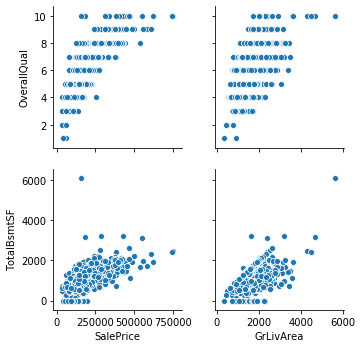

In [14]:
sns.pairplot(data=housing,x_vars=["SalePrice", "GrLivArea"],y_vars=["OverallQual", "TotalBsmtSF"])

# Missing data

In [15]:
#missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
MiscFeature,1366,96.332863
Fence,1148,80.959097
GarageType,143,10.084626
Electrical,1,0.070522
SalePrice,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
FullBath,0,0.000000
GrLivArea,0,0.000000
TotalBsmtSF,0,0.000000


In [16]:
housing.drop(columns=['MiscFeature', 'Fence'],inplace=True)

In [17]:
housing.count()

Id             1418
OverallQual    1418
YearBuilt      1418
TotalBsmtSF    1418
Electrical     1417
GrLivArea      1418
FullBath       1418
GarageType     1275
GarageCars     1418
GarageArea     1418
SalePrice      1418
dtype: int64

In [18]:
# See that row where value for 'Electrical' column is null

housing[housing['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500


In [19]:
# Lets make a new data frame of a few rows (hard-copy)

df_electrical_missing = housing.iloc[1337:1342].copy()

In [20]:
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [21]:
# Use last valid observation to fill gap
df_electrical_missing['Electrical'].fillna(method='ffill')

1337    SBrkr
1338    SBrkr
1339    SBrkr
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [22]:
# Use next valid observation to fill gap 
df_electrical_missing['Electrical'].fillna(method='backfill')

1337    SBrkr
1338    SBrkr
1339    FuseF
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [23]:
# Location based replacement
df_electrical_missing.loc[1339,'Electrical'] = 'SBrkr'
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,SBrkr,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [24]:
## Lets drop the rows with missing value in 'Electrical' column
housing.dropna(subset=['Electrical'], inplace=True)

In [25]:
housing.isnull().sum()

Id               0
OverallQual      0
YearBuilt        0
TotalBsmtSF      0
Electrical       0
GrLivArea        0
FullBath         0
GarageType     143
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [26]:
## Lets see those rows where the 'GarageType' is null

housing[housing['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,84500


In [27]:
housing.groupby(['GarageType','GarageCars'])['GarageCars'].count()

GarageType  GarageCars
2Types      2               1
            3               4
            4               1
Attchd      1             105
            2             556
            3             138
            4               1
Basment     1               8
            2              11
BuiltIn     1               8
            2              48
            3              30
CarPort     1               3
            2               6
Detchd      1             178
            2             164
            3               9
            4               3
Name: GarageCars, dtype: int64

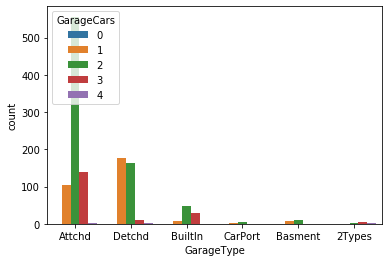

In [28]:
sns.countplot(x='GarageType', hue='GarageCars', data=housing)

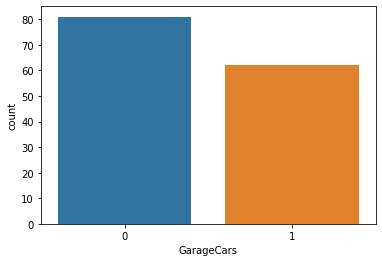

In [29]:
sns.countplot(x='GarageCars', data=housing[housing['GarageType'].isnull()])

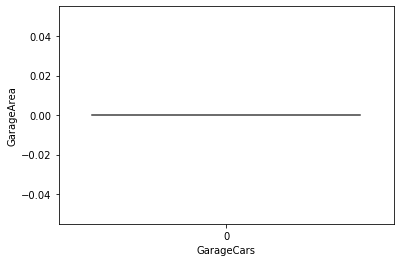

In [30]:
sns.violinplot('GarageCars','GarageArea',data=housing[housing['GarageCars']==0])

In [31]:
housing[housing['GarageCars']==0]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [32]:
housing['GarageType'] = np.where(housing['GarageCars'] == 1 & housing['GarageType'].isnull(),'Detchd', housing['GarageType'])
housing['GarageType'] = np.where(housing['GarageCars'] == 0 & housing['GarageType'].isnull(),'NoGarage', housing['GarageType'])

In [33]:
housing.count()

Id             1417
OverallQual    1417
YearBuilt      1417
TotalBsmtSF    1417
Electrical     1417
GrLivArea      1417
FullBath       1417
GarageType     1417
GarageCars     1417
GarageArea     1417
SalePrice      1417
dtype: int64

# Outliers detection and treatment

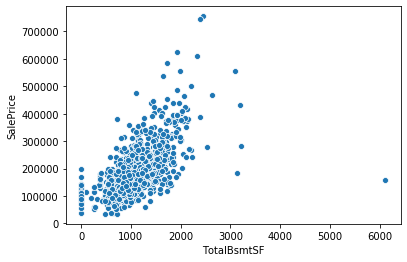

In [34]:
# Bivariate analysis between 'TotalBsmtSF' and 'SalePrice'

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

In [35]:
## Lets sort the data by "TotalBsmtSF" in the descending order

housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000


In [36]:
housing.drop(housing[housing['Id'] == 1261].index, inplace=True)

In [37]:
housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000


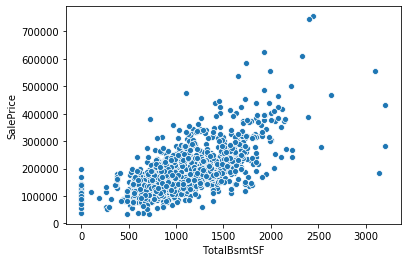

In [38]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

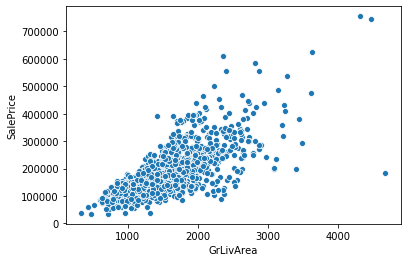

In [39]:
# Bivariate analysis between 'GrLivArea' and 'SalePrice'

sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

In [40]:
housing.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [41]:
a = housing[(housing['GrLivArea'] > 4000) & (housing['SalePrice'] < 300000)]
housing.drop(a.index, inplace=True)

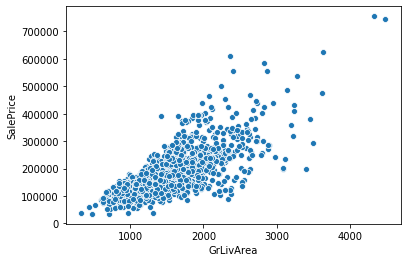

In [42]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

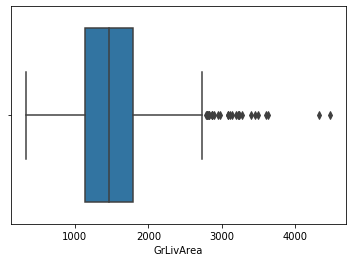

In [43]:
sns.boxplot(housing['GrLivArea'])

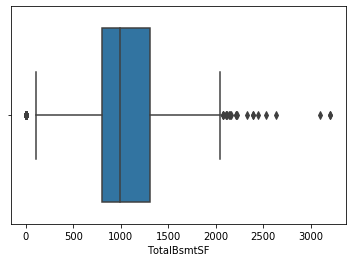

In [44]:
sns.boxplot(housing['TotalBsmtSF'])

In [45]:
Q1 = housing.quantile(0.25)    ## Returns a series of 1st quartile values  
Q3 = housing.quantile(0.75)    ## Returns a series of 3rd quartile values 
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [46]:
box_plot_val_df = pd.concat([LL,Q1, Q3,UL], axis=1, keys=['LL','Q1', 'Q3','UL'])

box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


### Lets handle the 'TotalBsmtSF' variable

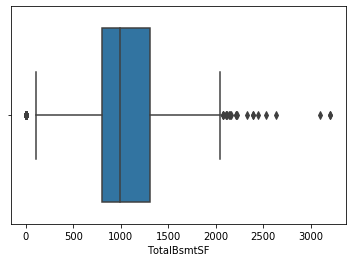

In [47]:
sns.boxplot(housing['TotalBsmtSF'])

In [48]:
box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


In [49]:
# Drop those rows where 'TotalBsmtSF' > 3000

housing.drop(housing[housing['TotalBsmtSF']>3000].index, inplace=True)

In [50]:
housing[housing['TotalBsmtSF']>3000].shape[0]

0

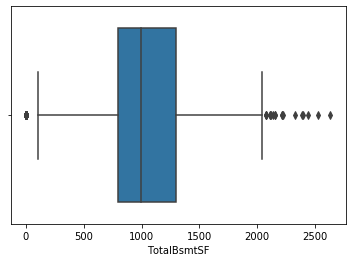

In [51]:
sns.boxplot(housing['TotalBsmtSF'])

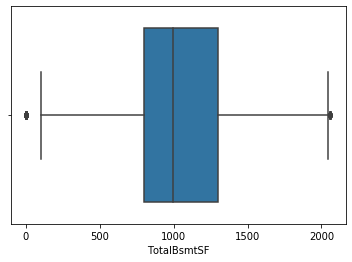

In [52]:
# Cap the outliers on the right side to value of UL
housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] > 2059.50, 2059.50,housing['TotalBsmtSF'])
sns.boxplot(housing['TotalBsmtSF'])

In [53]:
# Floor the outliers on the left side to value of LL

housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] < 39.50, 39.50,housing['TotalBsmtSF'])

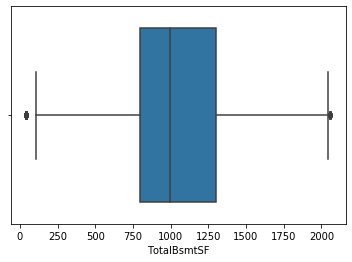

In [54]:
sns.boxplot(housing['TotalBsmtSF'])

##### This seems to be satisfactory enough.
##### So we can easily go ahead with it to keep it real. 

### Lets handle the 'GrLivArea' variable

Lets use the 3 standard deviation way of handling the outliers

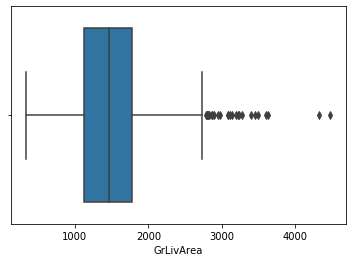

In [55]:
sns.boxplot(housing['GrLivArea'])

In [56]:
upper_limit = housing['GrLivArea'].mean() + 3*housing['GrLivArea'].std()
upper_limit

3035.160135701378

In [57]:
lower_limit = housing['GrLivArea'].mean() - 3*housing['GrLivArea'].std()
lower_limit

-9.825858080981334

In [58]:
# Lets drop those rows
housing.drop(housing[housing['GrLivArea']>upper_limit].index, inplace=True)
housing.drop(housing[housing['GrLivArea']<lower_limit].index, inplace=True)

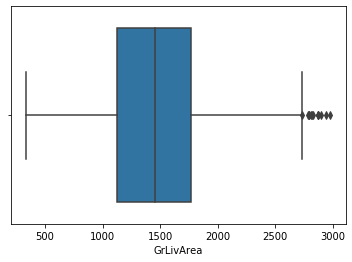

In [59]:
sns.boxplot(housing['GrLivArea'])

### Lets handle the 'GarageArea' variable

Lets use the z score method of handling the outliers

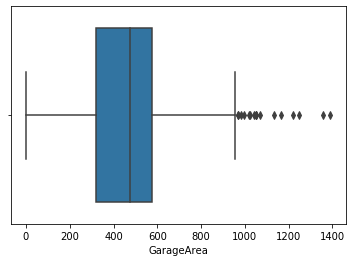

In [60]:
sns.boxplot(housing['GarageArea'])

In [61]:
# Add a new column in dataframe

housing['z_score_GarageArea'] = (housing['GarageArea'] - housing['GarageArea'].mean()) / housing['GarageArea'].std()

In [62]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,z_score_GarageArea
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548,208500,0.371064
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460,181500,-0.043155
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608,223500,0.653486
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642,140000,0.813525
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836,250000,1.726689


In [63]:
# Lets try capping

upper_limit = housing['GarageArea'].mean() + 3*housing['GarageArea'].std()
upper_limit

1106.512380942947

In [64]:
lower_limit = housing['GarageArea'].mean() - 3*housing['GarageArea'].std()
lower_limit

-168.17594572462207

In [65]:
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] > 3, upper_limit, housing['GarageArea'])
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] < -3, lower_limit, housing['GarageArea'])

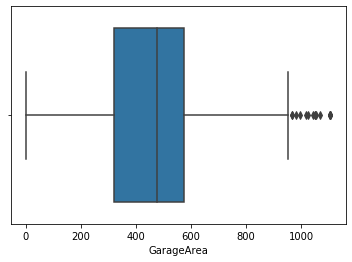

In [66]:
sns.boxplot(housing['GarageArea'])

In [67]:
housing.drop(columns='z_score_GarageArea',inplace=True)

In [68]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548.0,208500
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460.0,181500
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608.0,223500
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642.0,140000
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836.0,250000


In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1417
Data columns (total 11 columns):
Id             1397 non-null int64
OverallQual    1397 non-null int64
YearBuilt      1397 non-null int64
TotalBsmtSF    1397 non-null float64
Electrical     1397 non-null object
GrLivArea      1397 non-null int64
FullBath       1397 non-null int64
GarageType     1397 non-null object
GarageCars     1397 non-null int64
GarageArea     1397 non-null float64
SalePrice      1397 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 131.0+ KB


In [70]:
housing.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

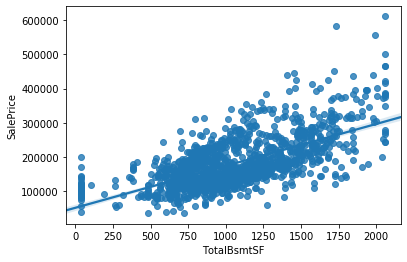

In [71]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=housing)

In [72]:
numerical_cols=housing.select_dtypes(include=np.number).columns

In [73]:
numerical_cols

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [74]:
housingdata_num=housing[numerical_cols]
housingdata_num

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,1710,2,2,548.0,208500
1,2,6,1976,1262.0,1262,2,2,460.0,181500
2,3,7,2001,920.0,1786,2,2,608.0,223500
3,4,7,1915,756.0,1717,1,3,642.0,140000
4,5,8,2000,1145.0,2198,2,3,836.0,250000
...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953.0,1647,2,2,460.0,175000
1414,1415,6,1978,1542.0,2073,2,2,500.0,210000
1415,1416,7,1941,1152.0,2340,2,1,252.0,266500
1416,1417,5,1950,1078.0,1078,1,1,240.0,142125


## Converting categorical variables into numerical

In [75]:
categorical_col=housing.select_dtypes(include=object).columns

In [76]:
categorical_col

Index(['Electrical', 'GarageType'], dtype='object')

In [77]:
housingdata_dummies=pd.get_dummies(housing[categorical_col])

In [78]:
housingdata_dummies

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0,0,0,0,1,0,1,0,0,0,0,0
1414,0,0,0,0,1,0,1,0,0,0,0,0
1415,0,0,0,0,1,0,1,0,0,0,0,0
1416,1,0,0,0,0,0,0,0,0,0,1,0


In [79]:
housedata_combined=pd.concat([housingdata_num,housingdata_dummies],axis=1)

In [80]:
housedata_combined

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Electrical_FuseA,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,1,7,2003,856.0,1710,2,2,548.0,208500,0,...,0,0,1,0,1,0,0,0,0,0
1,2,6,1976,1262.0,1262,2,2,460.0,181500,0,...,0,0,1,0,1,0,0,0,0,0
2,3,7,2001,920.0,1786,2,2,608.0,223500,0,...,0,0,1,0,1,0,0,0,0,0
3,4,7,1915,756.0,1717,1,3,642.0,140000,0,...,0,0,1,0,0,0,0,0,1,0
4,5,8,2000,1145.0,2198,2,3,836.0,250000,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953.0,1647,2,2,460.0,175000,0,...,0,0,1,0,1,0,0,0,0,0
1414,1415,6,1978,1542.0,2073,2,2,500.0,210000,0,...,0,0,1,0,1,0,0,0,0,0
1415,1416,7,1941,1152.0,2340,2,1,252.0,266500,0,...,0,0,1,0,1,0,0,0,0,0
1416,1417,5,1950,1078.0,1078,1,1,240.0,142125,1,...,0,0,0,0,0,0,0,0,1,0


In [81]:
housedata_combined.shape

(1397, 21)

In [82]:
housedata_combined.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'SalePrice', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarage'],
      dtype='object')

## Dividing the data into independent and dependent

In [83]:
#indepenent Variable
X=housedata_combined.drop(columns=['Id','SalePrice'])
## Dependent Variable 
Y=housedata_combined['SalePrice']

## Splitting the data into training and test data

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [85]:
X_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
1412,7,2004,1221.0,1221,2,2,400.0,0,0,0,0,1,0,1,0,0,0,0,0
802,6,1957,1392.0,1392,1,2,458.0,1,0,0,0,0,0,1,0,0,0,0,0
333,5,1941,616.0,1111,1,1,200.0,0,0,0,0,1,0,0,0,0,0,1,0
1255,5,1892,994.0,2372,2,1,432.0,0,0,0,0,1,0,0,0,0,0,1,0
990,7,2005,1346.0,1504,2,2,437.0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,5,1915,876.0,1416,1,3,720.0,0,0,0,0,1,0,0,0,0,0,1,0
53,8,1999,970.0,1739,2,2,480.0,0,0,0,0,1,0,1,0,0,0,0,0
355,7,2003,847.0,1928,2,2,434.0,0,0,0,0,1,0,0,0,1,0,0,0
79,3,1915,1013.0,1526,1,0,0.0,0,0,0,0,1,0,0,0,0,0,0,1


## Perform Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model=LinearRegression()

In [88]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
#Intercept 
print(model.intercept_)

-722114.214789267


In [90]:
#Coefficient 
print(pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficients']))

                     Coefficients
OverallQual          1.753586e+04
YearBuilt            3.266796e+02
TotalBsmtSF          4.467458e+01
GrLivArea            5.362676e+01
FullBath            -1.036728e+04
GarageCars           5.454358e+03
GarageArea           5.249221e+01
Electrical_FuseA     8.081388e+02
Electrical_FuseF     5.071634e+03
Electrical_FuseP    -7.315257e+03
Electrical_Mix      -3.637979e-12
Electrical_SBrkr     1.435484e+03
GarageType_2Types   -3.627566e+04
GarageType_Attchd    3.025561e+03
GarageType_Basment  -6.618763e+02
GarageType_BuiltIn   2.027134e+04
GarageType_CarPort  -1.260533e+04
GarageType_Detchd    1.597905e+03
GarageType_NoGarage  2.464806e+04


## Making Predictions

In [91]:
Y_pred=model.predict(X_test)

In [92]:
Y_pred
## value of Y as per rows 

array([289670.32830386, 151775.50507669, 298987.83844505, 149847.1200107 ,
       189251.13285786, 227952.09546053,  82527.61911751, 153860.03951049,
       215163.80393357,  59634.03406166, 186034.01534233, 111480.43541207,
       211222.31007805, 220369.51588625, 104158.7570012 , 319137.80109192,
       174944.55744264,  70258.63267278, 186415.43365818, 165394.51991468,
       130220.13738042, 121236.77324131, 194650.21384099, 136540.29170135,
       222453.98682029, 184916.20690793, 221284.85086069, 263137.0399039 ,
       187137.16339117, 208856.24030076, 152737.86381169, 247001.19978343,
       168488.51530051, 258338.53174571,  90215.38757069, 231369.49338837,
       184927.47995879, 158963.25454564, 121135.53677652, 160791.59168495,
       335291.20713693, 191802.97775085, 258352.33030002, 110497.96320359,
        44599.69792188, 168653.54569467, 165513.18956371,  94444.50601673,
       195906.25023645,  48883.04034507,  87894.30680298, 201089.86830717,
       210082.15933166, 1

In [93]:
from sklearn import metrics 
from math import sqrt

In [94]:
r_square=metrics.r2_score(Y_test,Y_pred)

In [95]:
print(r_square)

0.8340323699230324


In [96]:
mse=metrics.mean_squared_error(Y_test,Y_pred)

In [97]:
mse

840629362.969937

In [98]:
rmse=sqrt(mse)

In [99]:
rmse

28993.609002156612

In [100]:
np.sqrt(mse)

28993.609002156612

## Plotting of residual

In [101]:
Y_pred-Y_test

529     34170.328304
833     19275.505077
736    -38012.161555
194     -6152.879989
486    -19048.867142
            ...     
24      -9601.557949
406    -15909.839788
1359    21587.365494
157    -25867.412441
550     10715.081955
Name: SalePrice, Length: 420, dtype: float64

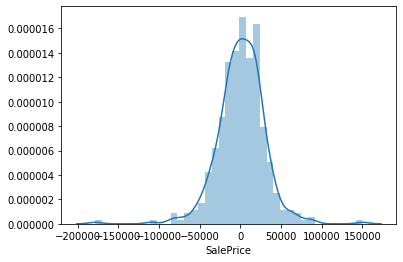

In [102]:
sns.distplot(Y_pred-Y_test)

In [103]:
## scatterplot between predicted values and residuals

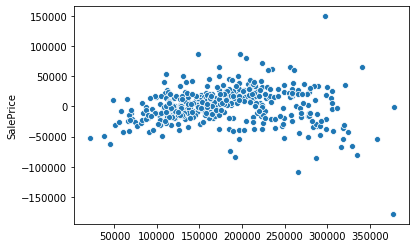

In [104]:
sns.scatterplot(x=Y_pred,y=Y_pred-Y_test)

## Line plots of residuals

In [105]:
list_values=[i for i in range(0,len(Y_test))]

Text(0.5, 1.0, 'Actual(Blue)Vs.Predicted(Red)')

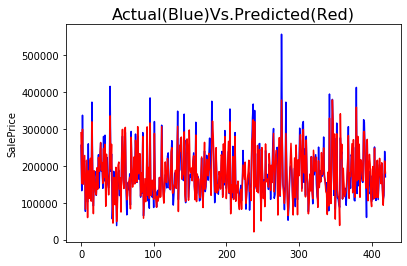

In [106]:
sns.lineplot(list_values,Y_test,color='blue')
sns.lineplot(list_values,Y_pred,color='red')
plt.title('Actual(Blue)Vs.Predicted(Red)',fontsize=16)

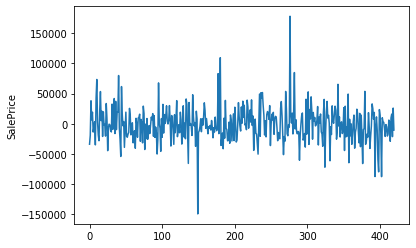

In [131]:
sns.lineplot(list_values,Y_test-Y_pred)

## Model performance

In [107]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)

In [108]:
rsquare=r2_score(Y_test,Y_pred)

In [109]:
print(rsquare)

0.8340323699230324


In [110]:
## higher the value of R square in SLR better the model is 

## Adjusted R square

In [116]:
## Adj r2=1-((n-1)/(n-k-1)*(1-rsquare))

In [118]:
# n=sample size 

n=X_test.shape[0]
n

420

In [120]:
# k=No. of independent variables 
k=X_test.shape[1]
k

19

In [121]:
adj_r2=1-((n-1)/(n-k-1)*(1-rsquare))
adj_r2

0.8261489074943764

In [124]:
## pvalue for checking the significance of variables thorugh stats model 
import statsmodels.api as sm 

In [125]:
X_train_sm=sm.add_constant(X_train)

C:\Users\Rohit Charaya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [128]:
stats_model=sm.OLS(Y_train,X_train_sm).fit()

In [129]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     269.2
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:29:37   Log-Likelihood:                -11514.
No. Observations:                 977   AIC:                         2.306e+04
Df Residuals:                     960   BIC:                         2.314e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.184e+05   7.84e+04     -6.609      0.000   -6.72e+05   -3.65e+05
OverallQual          1.754e+04   1212.236     14.466      0.000    1.52e+04    1.99e+04
YearBuilt             326.6796     57.127      5.718      0.000     214.572     438.788
TotalBsmtSF            44.6746      3.462     12.903      0.000      37.880      51.469
GrLivArea              53.6268      3.435     15.610      0.000      46.885      60.369
FullBath            -1.037e+04   2772.616     -3.739      0.000   -1.58e+04   -4926.196
GarageCars           5454.3575   3348.619      1.629      0.104   -1117.100     1.2e+04
GarageArea             52.4922     11.013      4.766      0.000      30.879      74.106
Electrical_FuseA    -1.288e+05   2.02e+04     -6.366      0.000   -1.69e+05   -8.91e+04
Electrical_FuseF    -1.245e+05   2.09e+04     -5.972      0.000   -1.65e+05   -8.36e+04
Electrical_FuseP    -1.369e+05   2.41e+04     -5.684      0.000   -1.84e+05   -8.97e+04
Electrical_Mix      -1.749e-11   3.03e-12     -5.773      0.000   -2.34e-11   -1.15e-11
Electrical_SBrkr    -1.282e+05   2.07e+04     -6.188      0.000   -1.69e+05   -8.75e+04
GarageType_2Types   -1.103e+05   1.68e+04     -6.586      0.000   -1.43e+05   -7.75e+04
GarageType_Attchd   -7.104e+04   1.22e+04     -5.800      0.000   -9.51e+04    -4.7e+04
GarageType_Basment  -7.472e+04   1.38e+04     -5.429      0.000   -1.02e+05   -4.77e+04
GarageType_BuiltIn  -5.379e+04   1.36e+04     -3.964      0.000   -8.04e+04   -2.72e+04
GarageType_CarPort  -8.667e+04   1.66e+04     -5.229      0.000   -1.19e+05   -5.41e+04
GarageType_Detchd   -7.247e+04   1.11e+04     -6.515      0.000   -9.43e+04   -5.06e+04
GarageType_NoGarage -4.941e+04   1.27e+04     -3.890      0.000   -7.43e+04   -2.45e+04
==============================================================================
Omnibus:                      324.976   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2611.288
Skew:                           1.293   Prob(JB):                         0.00
Kurtosis:                      10.580   Cond. No.                     3.31e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.78e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""